# Regression
##### First use Linear Regression to predict automobile prices. Then apply Lasso and Ridge Regression models on the same data and compare results

In [4]:
import pandas as pd
print('hi')

hi


In [5]:
print(pd.__version__)

0.23.4


### Download the Automobile data set
<b>Download link:</b> https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

<b>Summary:</b> Predict the price of a vehicle given other information about it

<b>Parameters: </b> <br />
1st argument is the location of the file (not necessarily a csv file) <br />
<b>sep</b> specifies the separator, which can also be expressed as a regular expression. Here we trim whitespaces around the commas<br />
<b>engine</b> represents the parsing engine. The values are <i>c</i> and <i>python</i>. The C engine is marginally faster but Python may offer more features 

In [6]:
#auto_data = pd.read_csv('imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data = pd.read_csv('imports-85.data')
auto_data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


#### Fill missing values with NaN

In [7]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


#### Information about numeric fields in our dataframe
Note that the automobile price is not present

In [8]:
auto_data.describe()

,3,88.60,168.80,64.10,48.80,2548,130,9.00,21,27
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Information about all fields in our dataframe

In [9]:
auto_data.describe(include='all')

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
count,204.000000,164,204,204,204,202,204,204,204,204.000000,...,204.000000,204,200,200,204.000000,202,202,204.000000,204.000000,200
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,185
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,7775
freq,NaN,11,32,184,167,114,96,120,201,NaN,...,NaN,93,23,20,NaN,19,37,NaN,NaN,2
mean,0.823529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.806373,...,126.892157,NaN,NaN,NaN,10.148137,NaN,NaN,25.240196,30.769608,NaN
std,1.239035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.994144,...,41.744569,NaN,NaN,NaN,3.981000,NaN,NaN,6.551513,6.898337,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.575000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,119.500000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,142.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.500000,NaN


### Data Cleaning
Also called data cleansing. Involves identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

#### What data type is price?

In [11]:
auto_data['price'].describe()

KeyError: 'price'

#### Convert the values in the price column to numeric values
If conversion throws an error set to NaN (by setting errors='coerce')

In [12]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') 

KeyError: 'price'

In [8]:
auto_data['price'].describe()

KeyError: 'price'

#### Dropping a column which we deem unnecessary

In [9]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

KeyError: "['normalized-losses'] not found in axis"

In [10]:
auto_data.describe()

,3,88.60,168.80,64.10,48.80,2548,130,9.00,21,27
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Horsepower is also non-numeric...

In [11]:
auto_data['horsepower'].describe()

KeyError: 'horsepower'

#### ...so this is also converted to a numeric value

In [12]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce') 

KeyError: 'horsepower'

In [13]:
auto_data['horsepower'].describe()

KeyError: 'horsepower'

In [14]:
auto_data['num-of-cylinders'].describe()

KeyError: 'num-of-cylinders'

#### Since there are only 7 unique values, we can explicitly set the corresponding numeric values

In [15]:
cylinders_dict = {'two': 2, 
                  'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)

auto_data.head()

KeyError: 'num-of-cylinders'

#### All other non-numeric fields can be made into usable features by applying one-hot-encoding

In [16]:
auto_data = pd.get_dummies(auto_data, 
                           columns=['make', 
                                    'fuel-type', 
                                    'aspiration', 
                                    'num-of-doors', 
                                    'body-style', 
                                    'drive-wheels', 
                                    'engine-location', 
                                    'engine-type', 
                                    'fuel-system'])
auto_data.head()

KeyError: "['make' 'fuel-type' 'aspiration' 'num-of-doors' 'body-style'\n 'drive-wheels' 'engine-location' 'engine-type' 'fuel-system'] not in index"

#### Drop rows containing missing values

In [17]:
auto_data = auto_data.dropna()
auto_data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925
11,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,20970
12,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151
18,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295


#### Verify that there are no null values in the data set

In [18]:
auto_data[auto_data.isnull().any(axis=1)]

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495


### Data Cleaning is now complete
We can now use our data to build our models

#### Create training and test data using train_test_split

In [19]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

# Taking the labels (price)
Y = auto_data['price']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy,random_state ensure results are repeted
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

KeyError: "['price'] not found in axis"

#### Create a LinearRegression model with our training data

In [20]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
#Fit is the estimator,Now break our head
# email shiva the Ankit resume
linear_model.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

#### Check R-square on training data

In [ ]:
linear_model.score(X_train, Y_train)

#### View coefficients for each feature

In [ ]:
linear_model.coef_

#### A better view of the coefficients
List of features and their coefficients, ordered by coefficient value

In [ ]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

#### Make predictions on test data

In [21]:
y_predict = linear_model.predict(x_test)

NameError: name 'x_test' is not defined

#### Compare predicted and actual values of Price

In [22]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


NameError: name 'y_predict' is not defined

#### R-square score
For our model, how well do the features describe the price?

In [ ]:
r_square = linear_model.score(x_test, y_test)
r_square

#### Calculate Mean Square Error

In [ ]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

#### Root of Mean Square Error

In [ ]:
import math

math.sqrt(linear_model_mse)

### Lasso Regression
Cost Function: RSS + <b>&alpha;</b>*(sum of absolute values of coefficients)

RSS = Residual Sum of Squares

Larger values of <b>&alpha;</b> should result in smaller coefficients as the cost function needs to be minimized

In [ ]:
from sklearn.linear_model import Lasso

#lasso_model = Lasso(alpha=0.5, normalize=True)#Normalize is true ->Center the data by substracting the mean and dividing by the l2 Norm
lasso_model = Lasso(alpha=0.5)#change this value 
lasso_model.fit(X_train, Y_train)

#### Check R-square on training data

In [ ]:
lasso_model.score(X_train, Y_train)

#### Coefficients when using Lasso

In [29]:
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

NameError: name 'lasso_model' is not defined

#### Make predictions on test data

In [24]:
y_predict = lasso_model.predict(x_test)

NameError: name 'lasso_model' is not defined

#### Compare predicted and actual values of Price

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


NameError: name 'y_predict' is not defined

#### Check R-square value on test data

In [3]:
r_square = lasso_model.score(x_test, y_test)
r_square

NameError: name 'lasso_model' is not defined

#### Is the root mean square error any better?

In [27]:
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

NameError: name 'mean_squared_error' is not defined

### Ridge Regression
Cost Function: RSS + <b>&alpha;</b>*(sum of squares of coefficients)

RSS = Residual Sum of Squares

Larger values of α should result in smaller coefficients as the cost function needs to be minimized

Ridge Regression penalizes large coefficients even more than Lasso as coefficients are squared in cost function

In [28]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.05, normalize=True)
ridge_model.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

#### Check R-square on training  data

In [38]:
ridge_model.score(X_train, Y_train)

0.95382480356425681

#### Coefficients when using Ridge

In [39]:
coef = pd.Series(ridge_model.coef_,predictors).sort_values()
print(coef)

make_jaguar              -4721.702089
engine-location_front    -3375.974878
make_peugot              -3042.959224
make_isuzu               -2186.005015
engine-type_ohcv         -2070.071555
make_mercury             -1886.420238
make_plymouth            -1866.358266
make_mitsubishi          -1849.750707
make_dodge               -1424.482791
make_toyota              -1217.908816
make_nissan              -1136.396198
make_subaru              -1125.402397
fuel-system_1bbl         -1029.775416
stroke                    -923.794701
fuel-system_mfi           -895.203607
aspiration_std            -803.283234
engine-type_dohc          -721.693473
bore                      -596.120417
drive-wheels_fwd          -572.601182
body-style_wagon          -512.619400
fuel-system_spdi          -408.012399
fuel-type_gas             -330.762925
symboling                 -290.993542
body-style_hatchback      -288.551757
make_volvo                -175.881081
fuel-system_mpfi          -115.001771
height      

#### Make predictions on test data

In [40]:
y_predict = ridge_model.predict(x_test)

#### Compare predicted and actual values of Price

Populating the interactive namespace from numpy and matplotlib


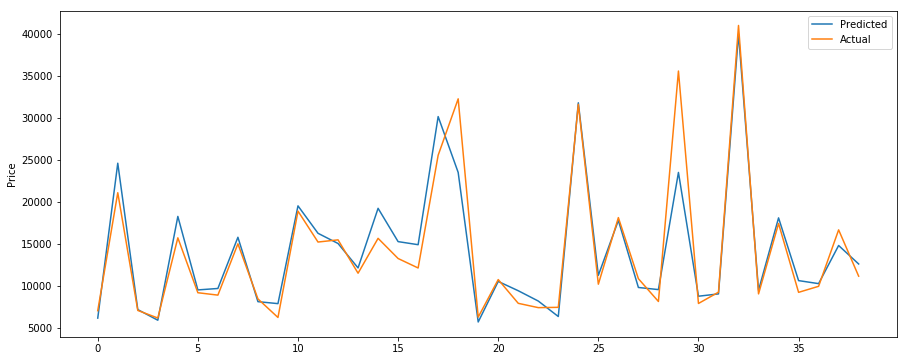

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Get R-square value for test data

In [42]:
r_square = ridge_model.score(x_test, y_test)
r_square

0.88756630341654985

In [43]:
ridge_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(ridge_model_mse)

2824.857626833396

### Apply SVR on this data set

In [44]:
from sklearn.svm import SVR

regression_model = SVR(kernel='linear', C=1.0)
regression_model.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### R-square on training data

In [45]:
regression_model.score(X_train, Y_train)

0.76018106031622446

In [46]:
coef = pd.Series(regression_model.coef_[0], predictors).sort_values()
print(coef)

body-style_hatchback     -15.913994
drive-wheels_fwd         -10.684989
make_mitsubishi           -9.000000
fuel-system_spdi          -8.000000
stroke                    -7.631257
body-style_wagon          -6.000000
make_subaru               -4.806859
num-of-doors_two          -4.625734
make_toyota               -4.000000
make_plymouth             -4.000000
engine-type_ohcv          -3.940745
fuel-system_1bbl          -3.000000
engine-location_front     -3.000000
make_isuzu                -2.000000
make_nissan               -2.000000
engine-type_ohcf          -1.806859
make_honda                -1.770995
aspiration_std            -1.625734
fuel-type_gas             -1.518599
make_peugot               -1.481401
bore                      -1.480885
fuel-system_mfi           -1.000000
make_mercury              -1.000000
fuel-system_spfi          -1.000000
make_jaguar               -0.940745
engine-type_l             -0.481401
fuel-system_4bbl           0.000000
make_dodge                 0

In [47]:
y_predict = regression_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


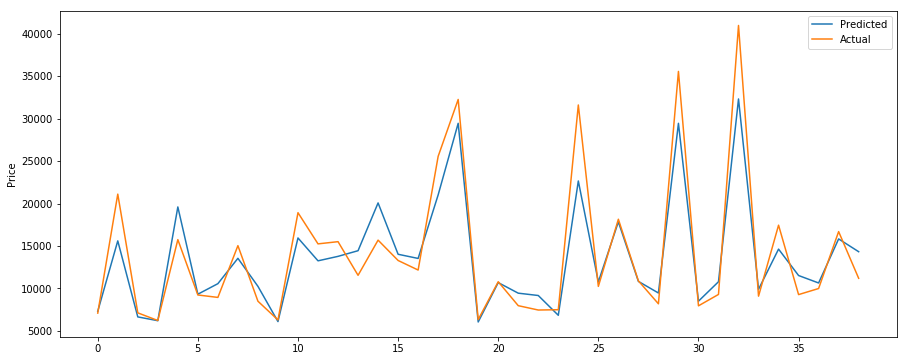

In [48]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### R-square on test data

In [49]:
r_square = regression_model.score(x_test, y_test)
r_square

0.87194002879123578

In [50]:
regression_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(regression_model_mse)

3014.775792136513